In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the two vectors
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

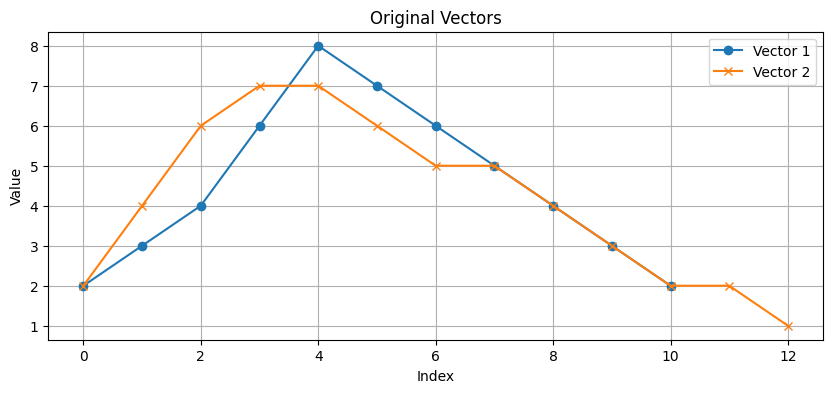

In [3]:
# Step 1: Plot the vectors
plt.figure(figsize=(10, 4))
plt.plot(vector_1, label='Vector 1', marker='o')
plt.plot(vector_2, label='Vector 2', marker='x')
plt.title("Original Vectors")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Step 2: Implement Dynamic Time Warping (DTW)
def dtw(vector1, vector2):
    n = len(vector1)
    m = len(vector2)
    cost_matrix = np.zeros((n, m))
    
    # Initialize cost matrix with high values
    cost_matrix[0, 0] = abs(vector1[0] - vector2[0])
    for i in range(1, n):
        cost_matrix[i, 0] = cost_matrix[i-1, 0] + abs(vector1[i] - vector2[0])
    for j in range(1, m):
        cost_matrix[0, j] = cost_matrix[0, j-1] + abs(vector1[0] - vector2[j])
    
    # Fill the cost matrix
    for i in range(1, n):
        for j in range(1, m):
            cost = abs(vector1[i] - vector2[j])
            cost_matrix[i, j] = cost + min(cost_matrix[i-1, j],    # Insertion
                                           cost_matrix[i, j-1],    # Deletion
                                           cost_matrix[i-1, j-1])  # Match
    
    # Backtrack to find the warping path
    i, j = n-1, m-1
    warping_path = [(i, j)]
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            steps = [cost_matrix[i-1, j], cost_matrix[i, j-1], cost_matrix[i-1, j-1]]
            step_idx = np.argmin(steps)
            if step_idx == 0:
                i -= 1
            elif step_idx == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        warping_path.append((i, j))
    warping_path.reverse()
    
    # DTW distance
    dtw_distance = cost_matrix[-1, -1]
    return cost_matrix, warping_path, dtw_distance

In [5]:
# Compute the DTW results
cost_matrix, warping_path, dtw_distance = dtw(vector_1, vector_2)


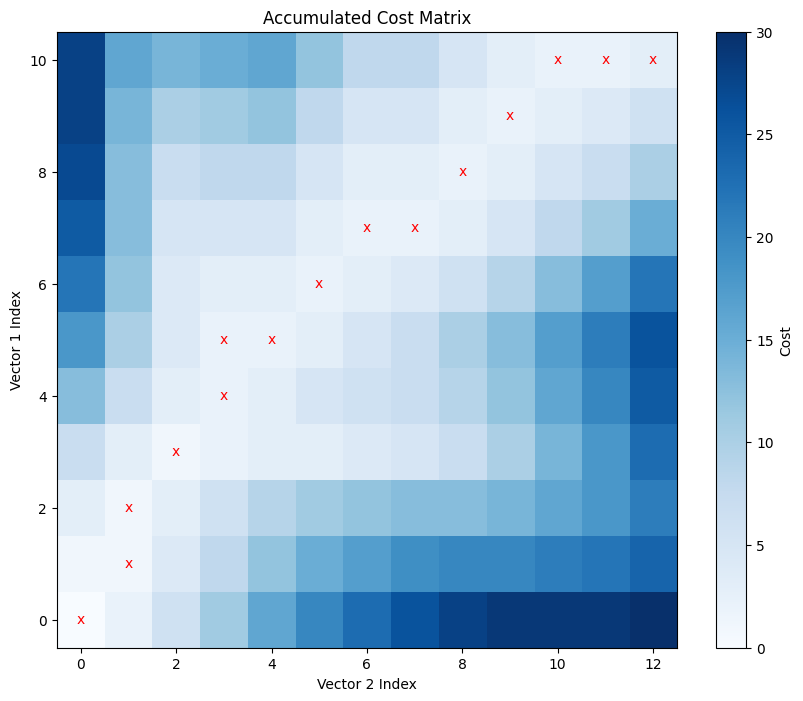

In [6]:
# Step 3: Plot the accumulated cost matrix
plt.figure(figsize=(10, 8))
plt.imshow(cost_matrix, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label="Cost")
plt.title("Accumulated Cost Matrix")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
for (i, j) in warping_path:
    plt.text(j, i, 'x', color="red", ha='center', va='center')
plt.show()

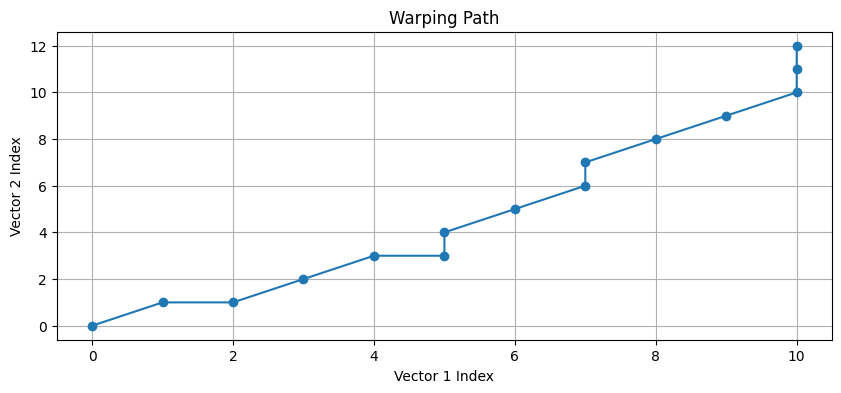

In [7]:
# Step 4: Plot the warping path
plt.figure(figsize=(10, 4))
plt.plot([pair[0] for pair in warping_path], [pair[1] for pair in warping_path], marker='o')
plt.title("Warping Path")
plt.xlabel("Vector 1 Index")
plt.ylabel("Vector 2 Index")
plt.grid(True)
plt.show()

In [8]:
# Step 5: Print the DTW distance and inference
print(f"DTW Distance: {dtw_distance:.2f}")

DTW Distance: 3.00


The warping path shows how the elements of Vector 1 are aligned with the elements of Vector 2. This alignment is flexible and accounts for differences in the timing or pace of the two vectors. For example, a single value in Vector 1 might align with multiple values in Vector 2 if Vector 2 stretches that part of the sequence.

The Dynamic Time Warping (DTW) distance is a measure of how similar the two vectors are. A smaller DTW distance means the patterns in the two vectors are closely aligned, even if one vector is stretched or shifted compared to the other. This makes DTW particularly useful for comparing time-series data or sequences that might not be perfectly synchronized but share an underlying pattern.

In this case, the DTW distance suggests that while Vector 2 is a stretched and shifted version of Vector 1, they are still very similar in overall shape and structure.